In [137]:
obama = open('obama.txt')
trump = open('trump.txt')
bush = open('bush.txt')
kennedy = open('kennedy.txt')
reagan = open('reagan.txt')
roosevelt = open('roosevelt.txt')

In [138]:
obama = obama.read()
trump = trump.read()
bush = bush.read()
reagan = reagan.read()
kennedy = kennedy.read()
roosevelt = roosevelt.read()

def filter_punct(text):
    text = text.lower()
    text = text.replace(',', '')
    text = text.replace(':', '')
    text = text.replace(';', '')
    text = text.replace('?', '')
    text = text.replace('<', '')
    text = text.replace('>', '')
    text = text.replace('.', '')
    text = text.replace('\n', ' ')
    text = text.replace('-', ' ')
    text = text.split(' ')
    for i in range(len(text)):
        if i == '':
            del text[i]
    return text

In [139]:
fobama = filter_punct(obama)
ftrump = filter_punct(trump)
fbush = filter_punct(bush)
fkennedy = filter_punct(kennedy)
freagan = filter_punct(reagan)
froosevelt = filter_punct(roosevelt)

In [140]:
import wordcloud as wc
import imageio
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import seaborn as sb

In [141]:
cloud = wc.WordCloud()

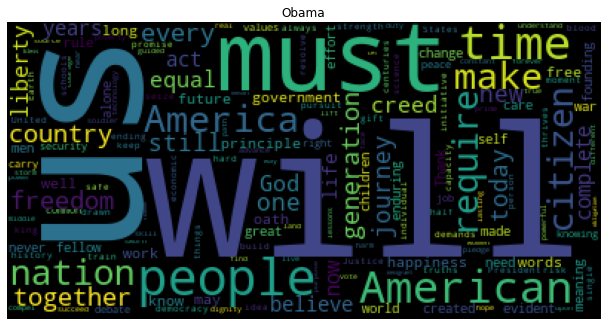

In [142]:
# Me code monkey, me copy and me paste
fig = plt.figure(figsize=(12,12))

ocloud = cloud.generate(obama)
cloud.to_file('obama.png')
fig.add_subplot(2,1,1)
plt.axis('off')
plt.title("Obama")

plt.imshow(ocloud)

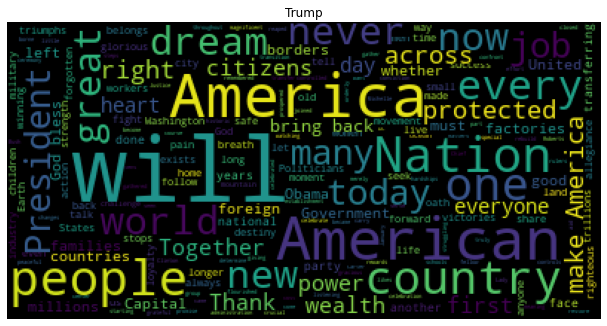

In [143]:
fig = plt.figure(figsize=(12,12))

tcloud = cloud.generate(trump)
cloud.to_file('trump.png')
fig.add_subplot(2,1,1)
plt.axis('off')
plt.title("Trump")

plt.imshow(tcloud)

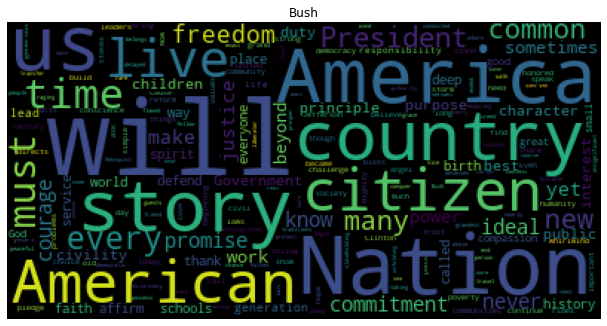

In [144]:
fig = plt.figure(figsize=(12,12))

bcloud = cloud.generate(bush)
cloud.to_file('bush.png')
fig.add_subplot(2,1,1)
plt.axis('off')
plt.title("Bush")

plt.imshow(bcloud)

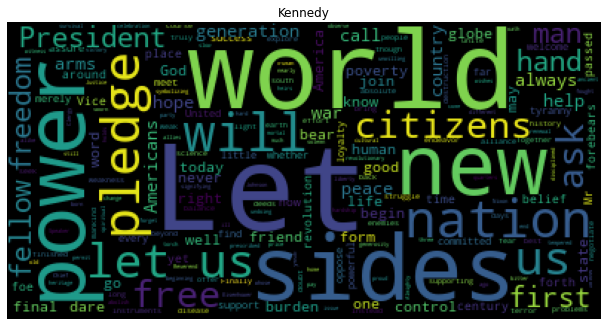

In [145]:
fig = plt.figure(figsize=(12,12))

kcloud = cloud.generate(kennedy)
cloud.to_file('kennedy.png')
fig.add_subplot(2,1,1)
plt.axis('off')
plt.title("Kennedy")

plt.imshow(kcloud)

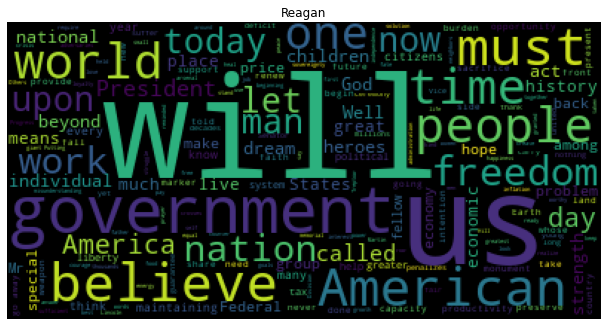

In [146]:
fig = plt.figure(figsize=(12,12))

rcloud = cloud.generate(reagan)
cloud.to_file('reagan.png')
fig.add_subplot(2,1,1)
plt.axis('off')
plt.title("Reagan")

plt.imshow(rcloud)

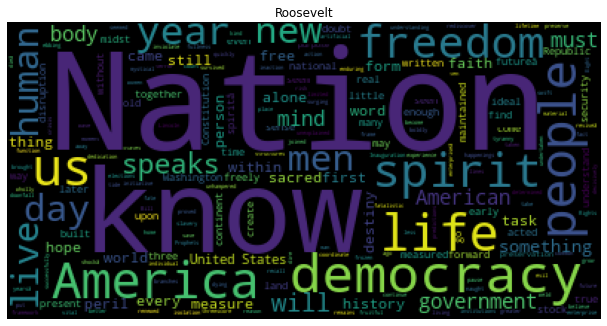

In [147]:
fig = plt.figure(figsize=(12,12))

rocloud = cloud.generate(roosevelt)
cloud.to_file('roosevelt.png')
fig.add_subplot(2,1,1)
plt.axis('off')
plt.title("Roosevelt")

plt.imshow(rocloud)

In [148]:
# An array with the word clouds. Because the question said to do that. Not sure why, but here
cloud_array = [ocloud, tcloud, bcloud, kcloud, rcloud, rocloud]

In [149]:
from collections import Counter

#this will rid my data of those pesky ''
def count_well(text):
    text_count = Counter(text)
    del text_count['']
    return text_count

In [150]:
ocounts = count_well(fobama)
tcounts = count_well(ftrump)
bcounts = count_well(fbush)
kcounts = count_well(fkennedy)
rcounts = count_well(freagan)
rocounts = count_well(froosevelt)

In [151]:
with open('positive-words.txt', 'r') as file:
    lines = file.readlines()
    pos_words = [line[:-1] for line in lines if line.startswith(';') == False and line != '\n']

In [152]:
with open('negative-words.txt', 'r') as file:
    lines = file.readlines()
    neg_words = [line[:-1] for line in lines if line.startswith(';') == False and line != '\n']

In [153]:
def find_sentiment_count(sent_words, word_dict):
    count = 0
    # Check if each word is in the list of sentiment words and add the dictionary value associated if it is
    for word in word_dict.keys():
        if word in sent_words:
            count += word_dict[word]
    return count

In [154]:
o_pos_count = find_sentiment_count(pos_words, ocounts)
t_pos_count = find_sentiment_count(pos_words, tcounts)
b_pos_count = find_sentiment_count(pos_words, bcounts)
k_pos_count = find_sentiment_count(pos_words, kcounts)
r_pos_count = find_sentiment_count(pos_words, rcounts)
ro_pos_count = find_sentiment_count(pos_words, rocounts)

In [155]:
o_neg_count = find_sentiment_count(neg_words, ocounts)
t_neg_count = find_sentiment_count(neg_words, tcounts)
b_neg_count = find_sentiment_count(neg_words, bcounts)
k_neg_count = find_sentiment_count(neg_words, kcounts)
r_neg_count = find_sentiment_count(neg_words, rcounts)
ro_neg_count = find_sentiment_count(neg_words, rocounts)

In [156]:
#The qualifier of a non trivial word being a word of a certain length is terrible. I'm going to make a list of common pronouns, 
#adjunctions, to-be verbs, articles, prepositions
#I do this here because I want the ratio of sentiment words to relevant words
trivial_words = ["i", "a", "an", "of", "and", "to", "the", "is", "in", "it", 'its', "do", 'for', 'while',
             "you", "your", "that", "me", "my", "i'd", "i'm", "by", "as", 'from', 'than', 'on', 'when', 'upon'
             "but", 'are', 'be', 'so', 'we', 'or', 'been', 'our', 'us', 'she', 'he', 'it', 'they', 'now',
                'who', 'because', 'they', 'this', 'these', 'those', 'from', 'with', "we'll", 'what', 'than']


In [157]:
def filter_words(filter_words, speech):
    fspeech = []
    for word in speech:
        if word not in filter_words:
            fspeech.append(word)
    return fspeech

In [158]:
fobama_nt = filter_words(trivial_words, fobama)
ftrump_nt = filter_words(trivial_words, ftrump)
fbush_nt = filter_words(trivial_words, fbush)
fkennedy_nt = filter_words(trivial_words, fkennedy)
freagan_nt = filter_words(trivial_words, freagan)
froosevelt_nt = filter_words(trivial_words, froosevelt)

In [159]:
o_tot_count = len(fobama_nt)
t_tot_count = len(ftrump_nt)
b_tot_count = len(fbush_nt)
k_tot_count = len(fkennedy_nt)
r_tot_count = len(freagan_nt)
ro_tot_count = len(froosevelt_nt)

In [160]:
def find_sentiment(pos_count, neg_count, tot_count, party):
    # The idea behind this sentimentality measurement is that it measures the overall sentimentality of the speech
    # then multiplies it by an exponentialized ratio of positive to negative words. This can be interpreted as an estimation
    # of of our overall perception of the relative positivy of the speech compared to how positive the speech could have    \
    # possibly been (A score of 100 positive speech would have been nothing but words which are positive in connotation)
    sent_rate = ((pos_count + neg_count) / tot_count)
    pos_neg_perception = ((pos_count / (1.5 * neg_count))**2)
    pos_sent_score = (pos_neg_perception / sent_rate)
    return (party, pos_sent_score)

In [161]:
o_score = find_sentiment(o_pos_count, o_neg_count, o_tot_count, 0)
t_score = find_sentiment(t_pos_count, t_neg_count, t_tot_count, 1)
b_score = find_sentiment(b_pos_count, b_neg_count, b_tot_count, 1)
k_score = find_sentiment(k_pos_count, k_neg_count, k_tot_count, 0)
r_score = find_sentiment(r_pos_count, r_neg_count, r_tot_count, 1)
ro_score = find_sentiment(ro_pos_count, ro_neg_count, ro_tot_count, 0)

In [162]:
sentiment_score = [o_score, t_score, b_score, k_score, r_score, ro_score]

In [163]:
dfsentscore = pd.DataFrame(sentiment_score, columns = ['Party', 'Score'])

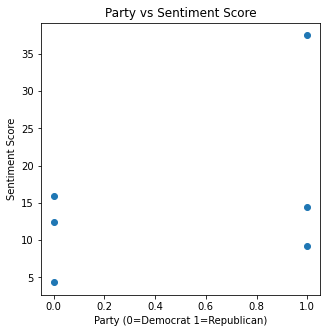

0.4513396659906679

In [164]:
plt.figure(figsize=(5,5))
plt.scatter(dfsentscore.Party, dfsentscore.Score)
plt.title('Party vs Sentiment Score')
plt.xlabel('Party (0=Democrat 1=Republican)')
plt.ylabel('Sentiment Score')
plt.show()

dfsentscore['Party'].corr(dfsentscore['Score'])

The strong positive correlation indicates that there is indeed a strong correlation between being republican and your language
being more positively sensationalized. In fact, Trump is a total outlier in terms of how positively sensationalized he is.
He's that lone dot in the upper right. Trump is responsible for pretty much all this correlation though. Other presidents are all quite similar.

In [165]:
ocounts_nt = count_well(fobama_nt)
tcounts_nt = count_well(ftrump_nt)
bcounts_nt = count_well(fbush_nt)
kcounts_nt = count_well(fkennedy_nt)
rcounts_nt = count_well(freagan_nt)
rocounts_nt = count_well(froosevelt_nt)

In [166]:
def find_vernacular(vocabulary):
    # Passes the vocabulary through a counter
    habits = count_well(vocabulary)

    # Find the words with the highest count
    vernacular_with_habits = habits.most_common(25)
    vernacular = []

    # Get rid of the count term in the returned tuple from the .most_common() function
    for i in range(len(vernacular_with_habits)):
        vernacular.append(vernacular_with_habits[i][0])
    return vernacular

In [167]:
# These are cosine similarity functions I took from lecture, renamed the variables so they apply better to this
def vectorize(vocab1, vocab2):
    return [1 if word in vocab1 else 0
              for word in vocab2]


def mag(v):
    """ magnitude of a vector """
    return sum([i **2 for i in v]) ** 0.5


def dot(u,v):
    """ dot product of two vectors """
    return sum([ui * vi for ui, vi in zip(u,v)])

In [168]:
def cosine_similarity(u, v):
    cos_theta = dot(u,v)/(mag(u) * mag(v))
    return cos_theta

In [169]:
nt_list = [find_vernacular(rocounts_nt), find_vernacular(rcounts_nt), find_vernacular(kcounts_nt), find_vernacular(bcounts_nt),
          find_vernacular(ocounts_nt), find_vernacular(tcounts_nt)]

In [170]:
def flatten(lol):
    flat = []
    for l in lol:
        flat.extend(l)
    return flat

In [171]:
compiled_lexicon = list({word for word in flatten(nt_list)})

In [172]:
similarity = [[cosine_similarity(vectorize(nt_list[i], compiled_lexicon), 
           vectorize(nt_list[j], compiled_lexicon)) 
             for i in range(len(nt_list))]
             for j in range(len(nt_list))]

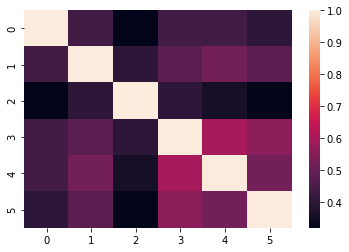

In [173]:
simarray = np.array(similarity)
heat_map = sb.heatmap(simarray)
plt.show()

I decided to go with the top 25 words because top 100 was just too variable, nothing was alike. Top 50 was similar, but in the top 25 usually the words would be used 3-4 times. This is literally the progression of the vocabulary over time, 0 term is Roosevelt, 5 term being Obama.

Roosevelt's speech is like no other

Reagan's speech is most like Obama's

Kennedy might as well be from a different planet

Bush Obama and Trump are all quite similar

In [174]:
def find_length_average(speech):
    character_count = 0
    word_count = 0
    # counts all the characters and letters in the speech
    for word in range(len(speech)):
        word_count += 1
        character_count += len(speech[word])
        
    return character_count / word_count

In [185]:
average_length = [['Roosevelt', find_length_average(froosevelt)], 
                  ['Reagan', find_length_average(freagan)],
                 ['Kennedy', find_length_average(fkennedy)],
                 ['Bush', find_length_average(fbush)],
                 ['Obama', find_length_average(fobama)],
                 ['Trump', find_length_average(ftrump)]]


array_length = pd.DataFrame(average_length, columns = ['presidents', 'average word length'])

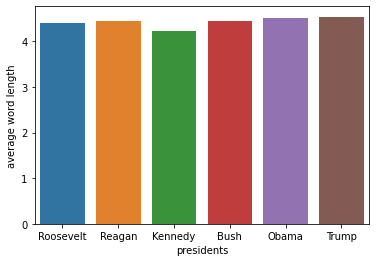

In [187]:
length_chart = sb.barplot(x='presidents', y='average word length', data=array_length)

All presidents have roughly the same average word length except Kennedy, who's words are slightly shorter on average

In [190]:
def unique_per_100(speech):
    unique_words = len(Counter(speech).keys())
    word_count = 0
    
    for i in range(len(speech)):
        word_count += 1
    
    return (unique_words/word_count)*100
        
    

In [193]:
def numbers_to_df(ro, r, k, b, o, t, c2):
    # This is a generic version of what I did manually above (Matching name to data and then returning a data frame)
    listlist = [['Roosevelt', ro], 
                  ['Reagan', r],
                 ['Kennedy', k],
                 ['Bush', b],
                 ['Obama', o],
                 ['Trump', t]]
    
    return pd.DataFrame(listlist, columns = ['presidents', c2])

In [194]:
unique_words_df = numbers_to_df(unique_per_100(froosevelt), 
                                unique_per_100(freagan), 
                                unique_per_100(fkennedy), 
                                unique_per_100(fbush),
                               unique_per_100(fobama),
                               unique_per_100(ftrump),
                               'Unique Words per 100')

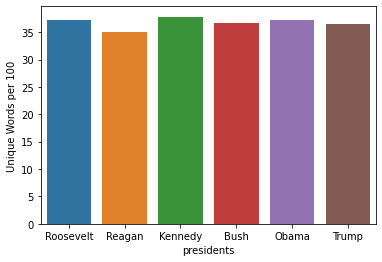

In [195]:
unique_chart = sb.barplot(x='presidents', y='Unique Words per 100', data=unique_words_df)

All Presidents use roughly 35 unique words per 100 words

In [196]:
def find_words_per_sentence(unfiltered, filtered):
    # Take unfiltered data and then count the splits on .
    sentence_count = len(unfiltered.split('.'))
    word_count = 0
    # Count the words once more
    for i in range(len(filtered)):
        word_count += 1
        
    return word_count / sentence_count

In [198]:
words_per_sentence_df = numbers_to_df(find_words_per_sentence(roosevelt, froosevelt), 
                                find_words_per_sentence(reagan, freagan), 
                                find_words_per_sentence(kennedy, fkennedy), 
                                find_words_per_sentence(bush, fbush),
                               find_words_per_sentence(obama, fobama),
                               find_words_per_sentence(trump, ftrump),
                               'Words per Sentence')

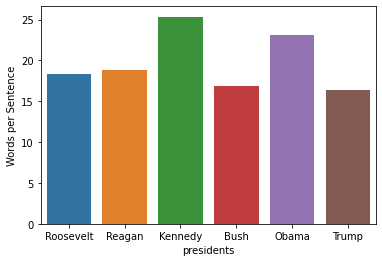

In [200]:
sentence_chart = sb.barplot(x='presidents', y='Words per Sentence', data=words_per_sentence_df)

Obama and Kennedy's sentences were much wordier than the other presidents.